This notebook plots the number of k-mers that are shared between different methods of metapangenome construction. Shared content is displayed with an upset plot.

In [3]:
setwd("..")

In [16]:
library(readr)
library(dplyr)
library(ggplot2)
library(ComplexUpset)

## Example upset plot

In [5]:
acc_db <- "GCF_009025805.1-s__Phocaeicola_vulgatus"  

In [7]:
metabat <- read_csv(paste0("outputs/metabat2_prokka_sigs_all/", acc_db, "_all_kmers.csv"),
                    col_names = c("metabat"), skip = 1, show_col_types = F)
kmers <- read_csv(paste0("outputs/nbhd_sigs_species_all/", acc_db, "_all_kmers.csv"),
                  col_names = "kmers", skip = 1, show_col_types = F)
roary <- read_csv(paste0("outputs/roary_sigs_all/", acc_db, "_pan_genome_reference_all_genes.csv"),
                  col_names = "roary", skip = 1, show_col_types = F)

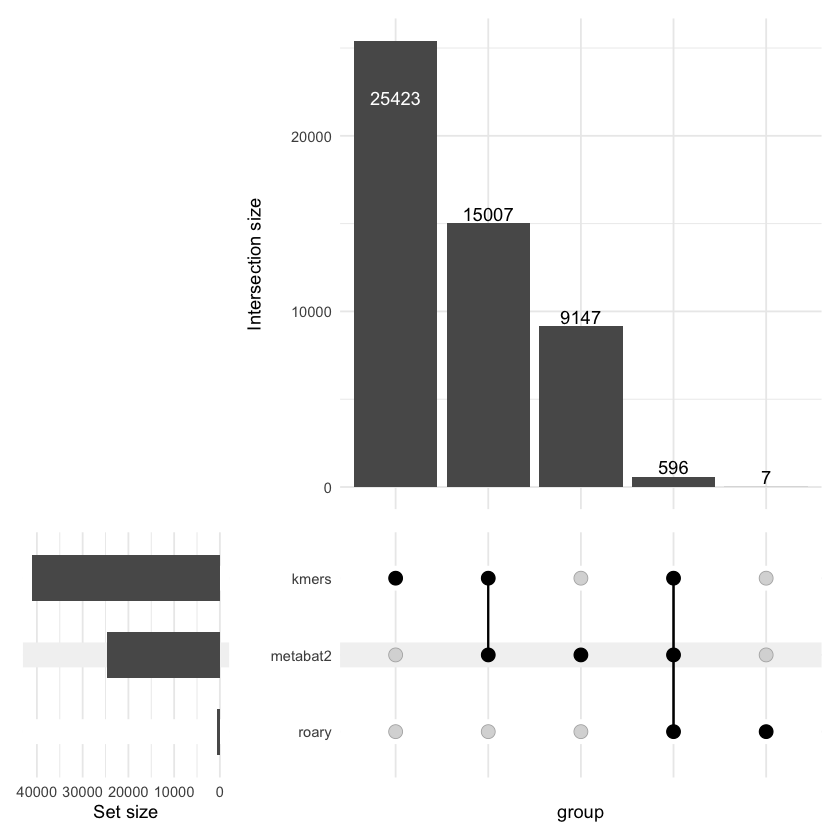

In [10]:
upset_df <- UpSetR::fromList(list(metabat2 = metabat$metabat,
                                  kmers = kmers$kmers,
                                  roary = roary$roary))
conditions <- c("metabat2", "kmers", "roary")
upset <- upset(upset_df, intersect = conditions)
upset


## Make a single upset plot and color by species

In [11]:
acc_dbs <- c("GCA_000162535.1-s__Parabacteroides_distasonis",
             "GCF_003433765.1-s__Enterocloster_bolteae",
             "GCF_003458955.1-s__Bacteroides_fragilis",   
             "GCF_003475305.1-s__Parabacteroides_merdae",
             "GCF_009020325.1-s__Bacteroides_uniformis",
             "GCF_009025805.1-s__Phocaeicola_vulgatus")

In [13]:
upset_df_combined <- data.frame()
for(acc_db in acc_dbs){
  metabat <- read_csv(paste0("outputs/metabat2_prokka_sigs_all/", acc_db, "_all_kmers.csv"),
                      col_names = c("metabat"), skip = 1, show_col_types = F)
  kmers <- read_csv(paste0("outputs/nbhd_sigs_species_all/", acc_db, "_all_kmers.csv"),
                    col_names = "kmers", skip = 1, show_col_types = F)
  roary <- read_csv(paste0("outputs/roary_sigs_all/", acc_db, "_pan_genome_reference_all_genes.csv"),
                    col_names = "roary", skip = 1, show_col_types = F)
  upset_df <- UpSetR::fromList(list(metabat2 = metabat$metabat,
                                    kmers = kmers$kmers,
                                    roary = roary$roary))
  upset_df$species <- acc_db
  upset_df_combined <- bind_rows(upset_df_combined, upset_df)
}

In [17]:
conditions <- c("metabat2", "kmers", "roary")
upset <- upset(upset_df_combined, intersect = conditions,
                   set_sizes=(
                     upset_set_size()
                     + theme(axis.text.x=element_text(angle=90))
                   ),
                   base_annotations = list("intersection size" = intersection_size(
                     counts = FALSE, mapping=aes(fill = species)) +
                       #scale_fill_manual(values = c("lightgrey", "#595959")) +
                       theme_classic() +
                       theme(axis.text.x = element_blank(),
                             axis.title.x = element_blank(),
                             axis.ticks.x = element_blank()))) +
  theme(panel.grid = element_blank(),
        axis.title.x = element_blank())

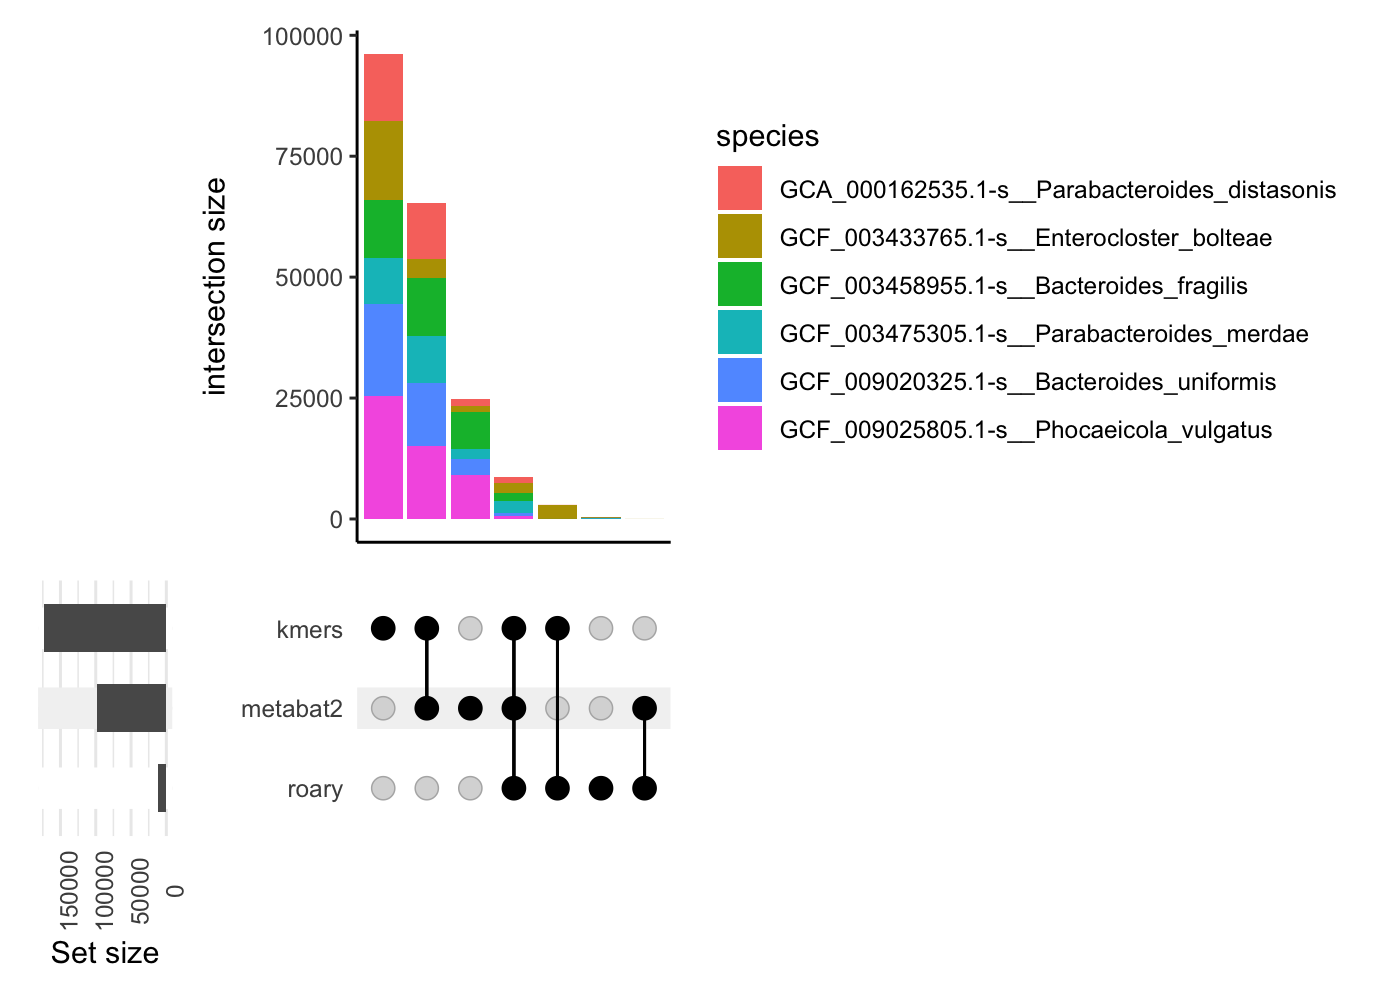

In [20]:
# adjust plot size rendered inline
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)

upset